### Customer Segmentation and Spending Behavior Analysis Using Machine Learning

**Abstract**

Customer segmentation is a crucial step in targeted marketing strategies. This project utilizes machine learning techniques to analyze customer data, segment customers based on spending habits, and visualize patterns. The dataset consists of demographic details, purchase history, and household characteristics. Principal Component Analysis (PCA) is applied to reduce dimensionality, and Agglomerative Clustering is used to classify customers into meaningful groups. The results provide insights into spending behavior, helping businesses tailor marketing strategies for different customer groups.

**Objective**

1) Perform customer segmentation based on spending behavior
2) Identify key features influencing customer spending
3) Visualize the clusters and their characteristics
4) Provide insights for marketing strategies using machine learning.

**ML Model Used**

Label Encoding, Principal Component Analysis(PCA), K-Means, Agglomerative Clustering

**Visualization tool**

Heatmap, Scatter plot, 3D-projection for PCA, KElbowVisulizer

In [107]:
#Importing the Libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [108]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')  # Load data
df.dropna(inplace=True)  # Remove missing values
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [109]:
# Feature Engineering
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df["Customer_For"] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df["Age"] = 2021 - df["Year_Birth"]
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [110]:
# Encoding Categorical Feature
df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner", "Together": "Partner",
    "Single": "Alone", "Divorced": "Alone", "Widow": "Alone", "YOLO": "Alone", "Absurd": "Alone"
})

In [111]:
# Drop unnecessary
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

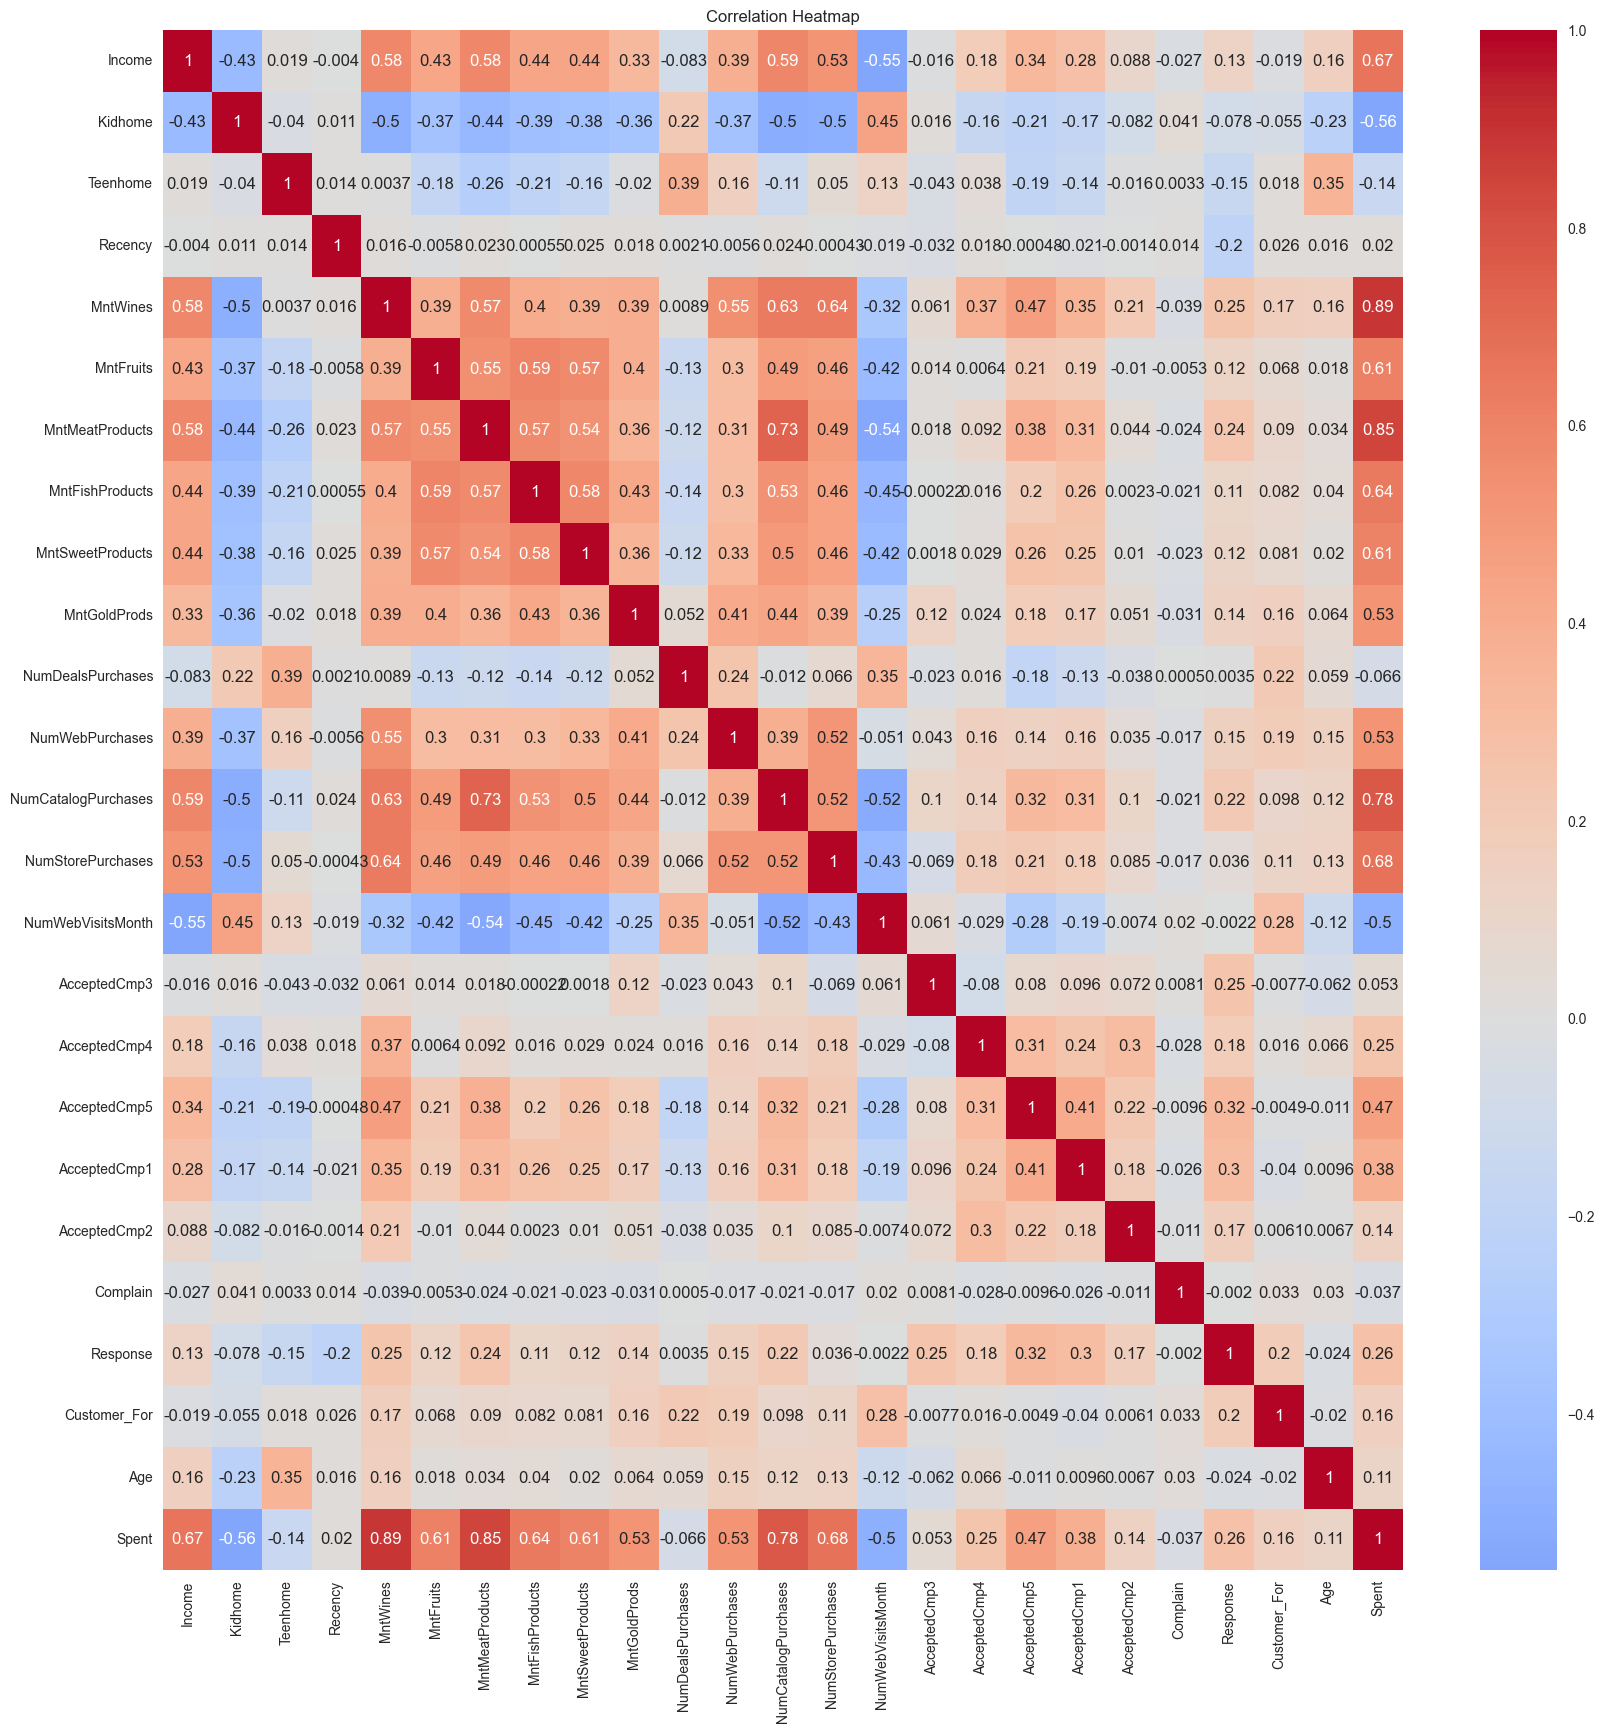

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns=['Living_With','Education']).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [113]:
# Label Encoding Categorical Features
LE = LabelEncoder()
for i in ['Education', 'Living_With']:
    df[i] = df[[i]].apply(LE.fit_transform)

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

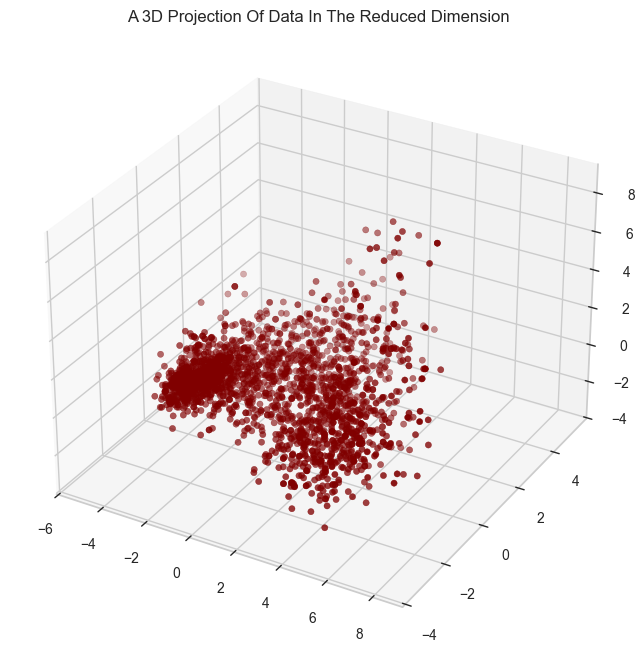

In [114]:
pca = PCA(n_components=3)
PCA_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=['col1','col2','col3'])
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

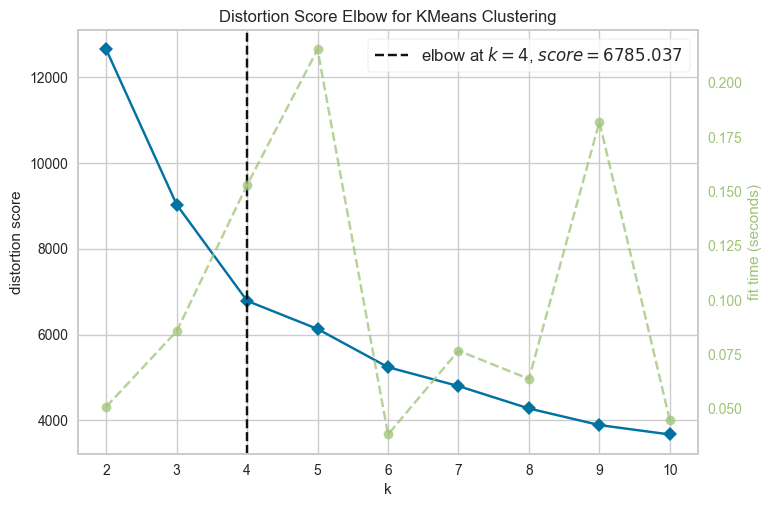

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
# Quick examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [116]:
# Clustering (Agglomerate Clustering)
AC = AgglomerativeClustering(n_clusters=4)
df["Clusters"] = AC.fit_predict(PCA_df)

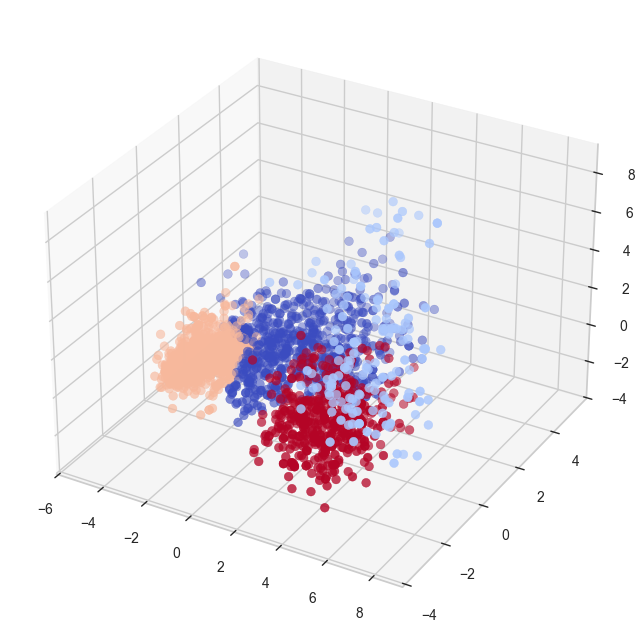

In [117]:
# 3D Cluster Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_df["col1"], PCA_df["col2"], PCA_df["col3"], c=df["Clusters"], cmap="coolwarm", s=40)
plt.show()

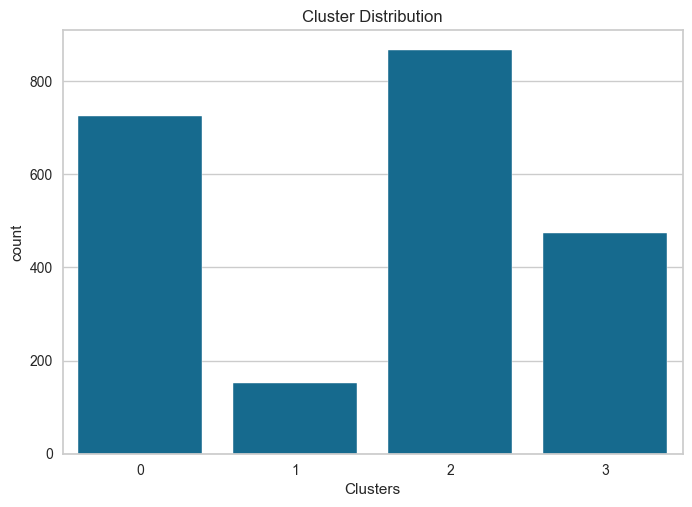

In [118]:
# Cluster Distribution
sns.countplot(x=df["Clusters"])
plt.title("Cluster Distribution")
plt.show()

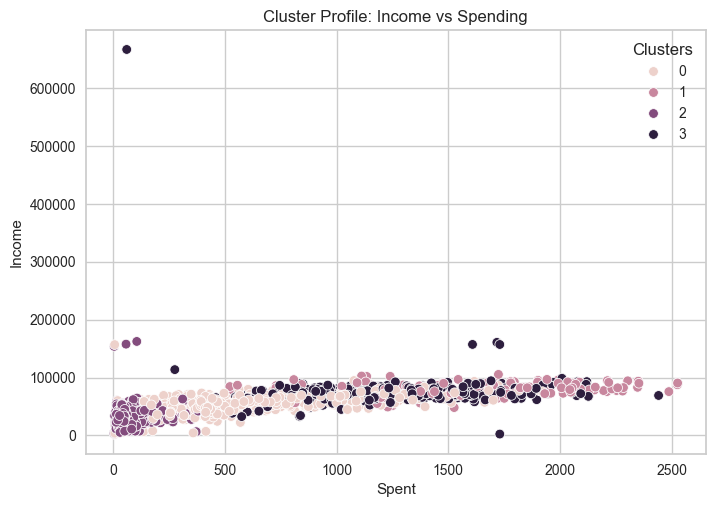

In [119]:
# Spending vs Income by Cluster
sns.scatterplot(x=df["Spent"], y=df["Income"], hue=df["Clusters"])
plt.title("Cluster Profile: Income vs Spending")
plt.show()

In [120]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Clusters
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,1,663,64,1617,0,3
1,2,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,113,67,27,0,2
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,312,56,776,1,3
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,139,37,53,1,2
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,161,40,422,1,0


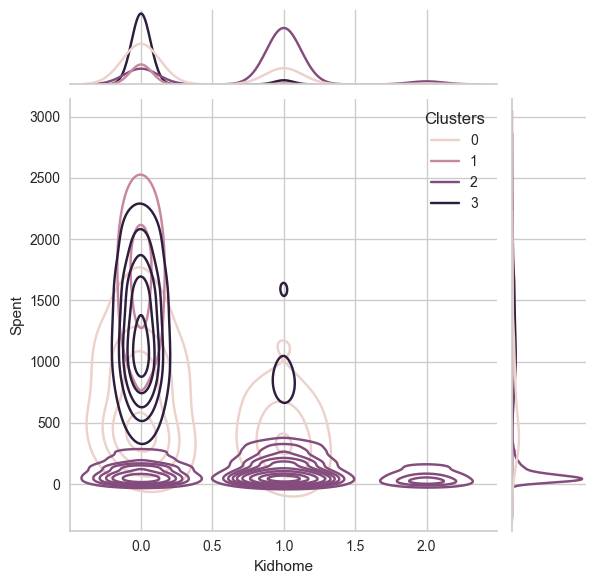

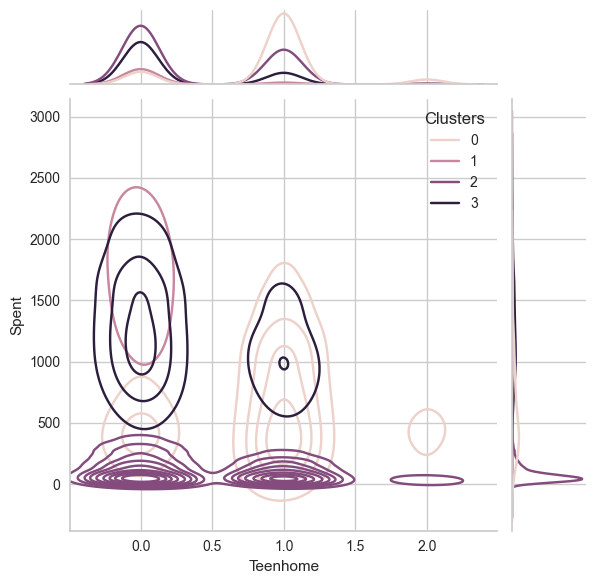

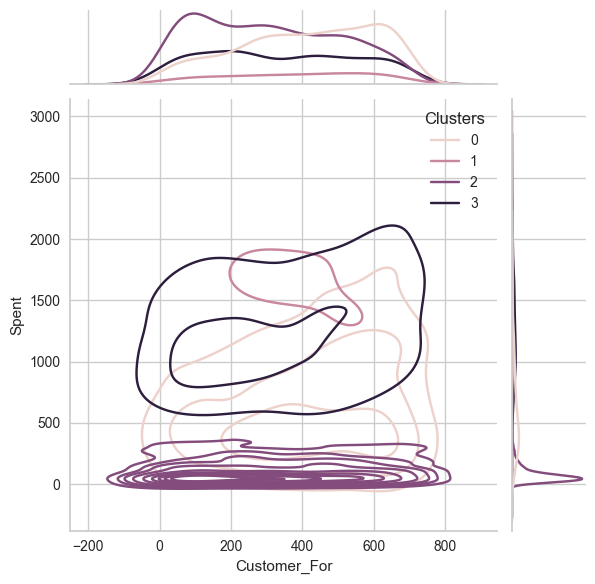

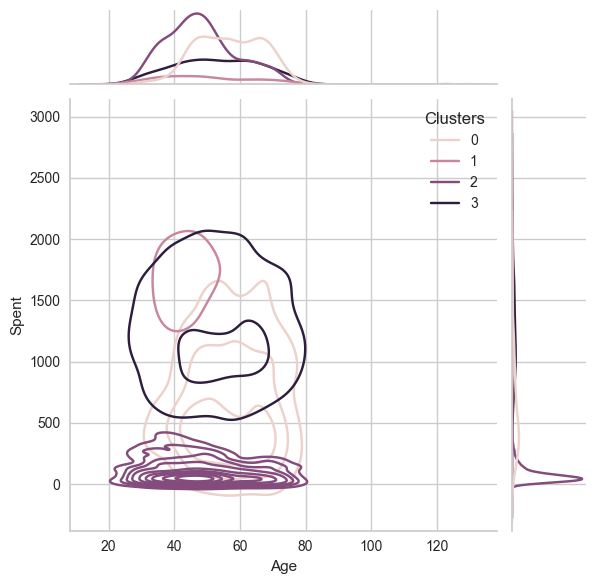

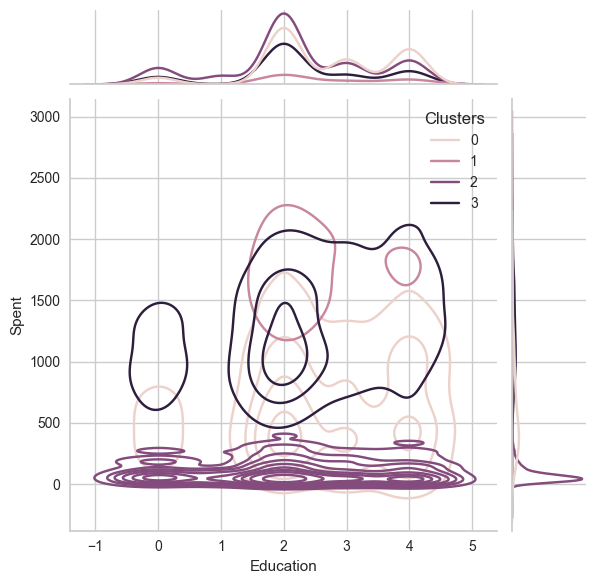

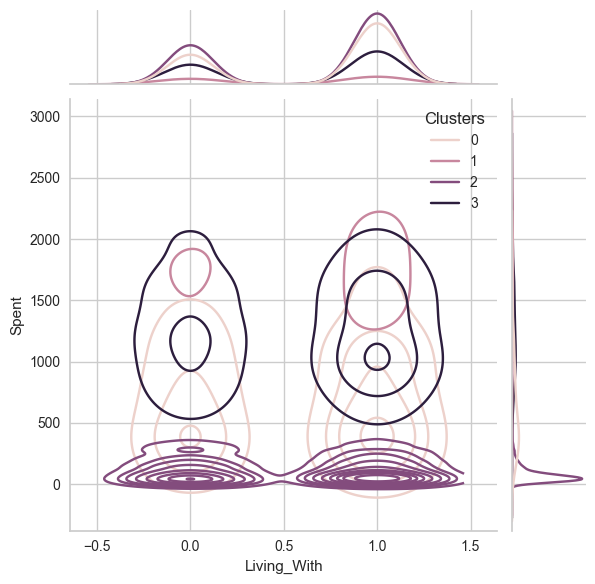

In [121]:
# Feature Influence on Spending
for i in ["Kidhome","Teenhome","Customer_For", "Age", "Education","Living_With"]:
    sns.jointplot(x=df[i], y=df["Spent"], hue=df["Clusters"], kind="kde")
    plt.show()